In [2]:
import networkx as nx
import numpy as np
from collections import defaultdict
import time

def analyze_gnp_components(n, a, num_instances=10):
    """
    Analyze multiple instances of G(n,p) with p = a/n
    Returns sizes of largest and second largest components
    """
    p = a/n
    largest_components = []
    second_largest_components = []
    
    for i in range(num_instances):
        G = nx.fast_gnp_random_graph(n, p)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        
        largest_components.append(largest/n)  # Store as fraction of n
        second_largest_components.append(second_largest/n)
    
    return {
        'n': n,
        'a': a,
        'p': p,
        'largest_mean': np.mean(largest_components),
        'largest_std': np.std(largest_components),
        'second_largest_mean': np.mean(second_largest_components),
        'second_largest_std': np.std(second_largest_components),
        'instances': list(zip(largest_components, second_largest_components))
    }

# Parameters
n_values = [1000, 10000, 100000]  # We'll start with these three
a_values = [0.8, 0.9, 1.0, 1.1, 1.2]
results = []

# Run analysis
for n in n_values:
    for a in a_values:
        print(f"Analyzing n={n}, a={a}")
        start_time = time.time()
        result = analyze_gnp_components(n, a)
        elapsed_time = time.time() - start_time
        print(f"Time taken: {elapsed_time:.2f} seconds")
        print(f"Largest component (mean ± std): {result['largest_mean']:.3f} ± {result['largest_std']:.3f}")
        print(f"Second largest component (mean ± std): {result['second_largest_mean']:.3f} ± {result['second_largest_std']:.3f}")
        print("---")
        results.append(result)

Analyzing n=1000, a=0.8
Time taken: 0.02 seconds
Largest component (mean ± std): 0.035 ± 0.023
Second largest component (mean ± std): 0.021 ± 0.007
---
Analyzing n=1000, a=0.9
Time taken: 0.01 seconds
Largest component (mean ± std): 0.045 ± 0.026
Second largest component (mean ± std): 0.027 ± 0.005
---
Analyzing n=1000, a=1.0
Time taken: 0.01 seconds
Largest component (mean ± std): 0.104 ± 0.061
Second largest component (mean ± std): 0.038 ± 0.018
---
Analyzing n=1000, a=1.1
Time taken: 0.01 seconds
Largest component (mean ± std): 0.145 ± 0.094
Second largest component (mean ± std): 0.048 ± 0.027
---
Analyzing n=1000, a=1.2
Time taken: 0.01 seconds
Largest component (mean ± std): 0.244 ± 0.081
Second largest component (mean ± std): 0.049 ± 0.029
---
Analyzing n=10000, a=0.8
Time taken: 0.16 seconds
Largest component (mean ± std): 0.007 ± 0.003
Second largest component (mean ± std): 0.005 ± 0.001
---
Analyzing n=10000, a=0.9
Time taken: 0.14 seconds
Largest component (mean ± std): 0.011

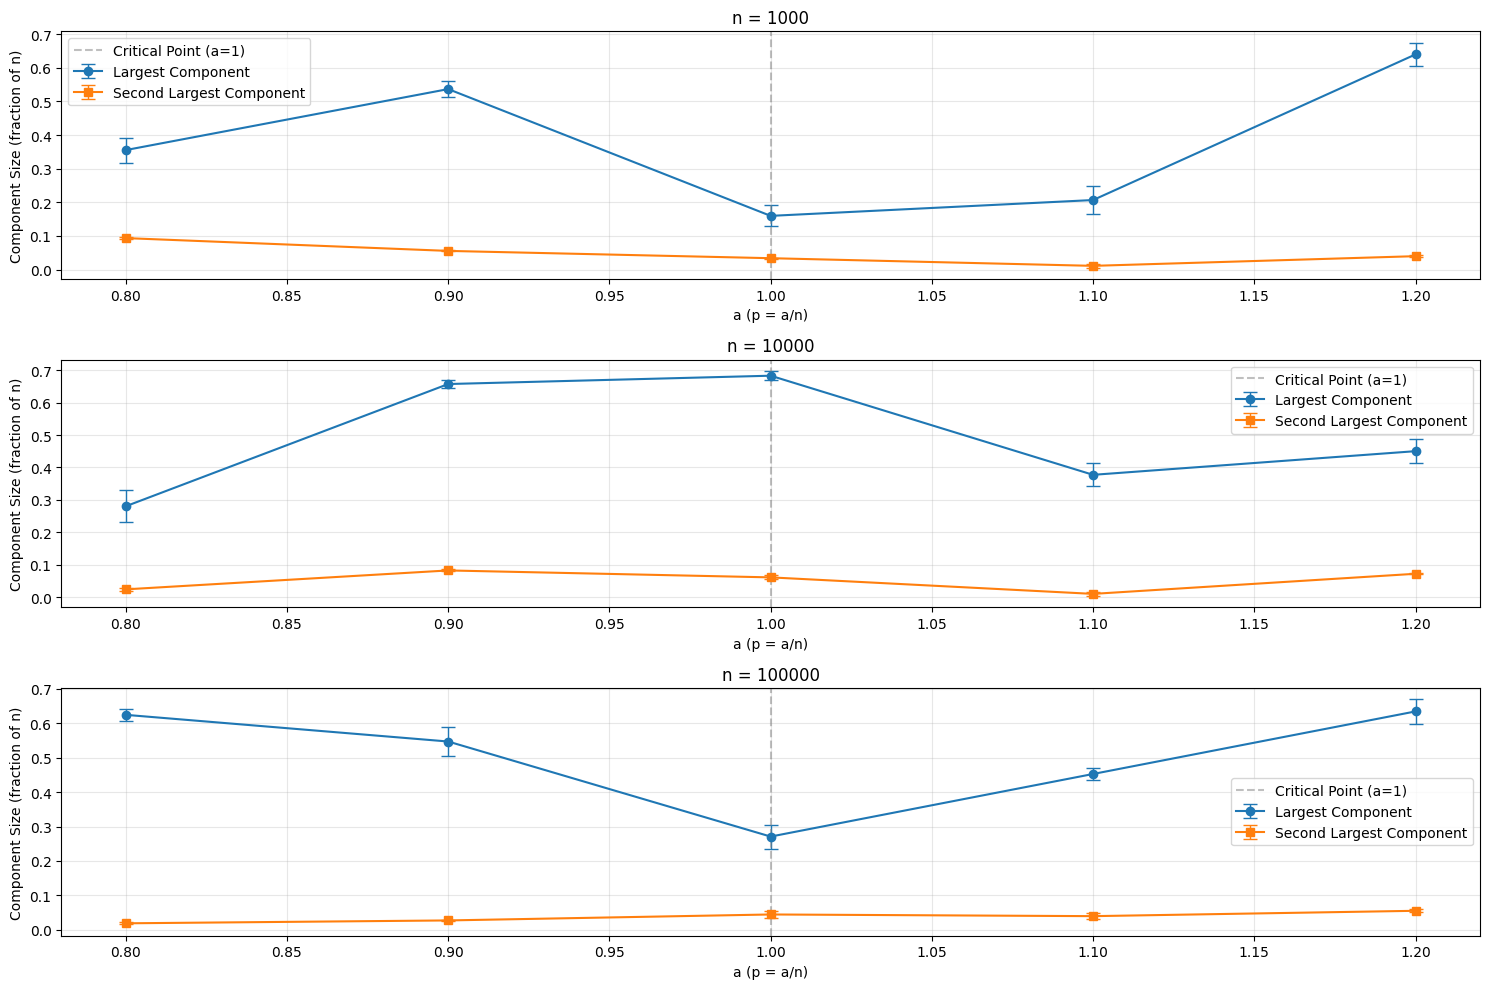

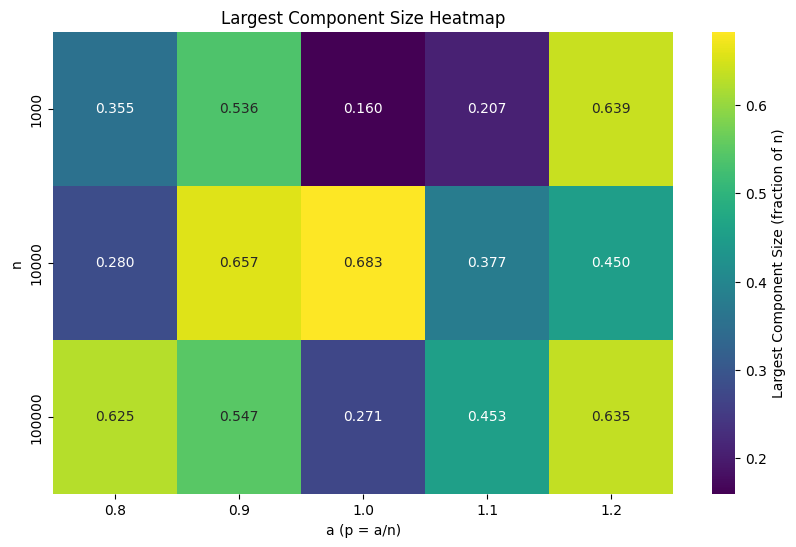

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_component_sizes(results_df, save_path=None):
    """
    Plot component sizes for different values of n and a
    
    Parameters:
    results_df: DataFrame with columns [n, a, largest_mean, largest_std, 
                                      second_largest_mean, second_largest_std]
    save_path: Optional path to save the figure
    """
    plt.figure(figsize=(15, 10))
    
    # Create subplot for each n value
    unique_n = sorted(results_df['n'].unique())
    num_n = len(unique_n)
    
    for idx, n in enumerate(unique_n, 1):
        plt.subplot(num_n, 1, idx)
        
        # Get data for this n
        data_n = results_df[results_df['n'] == n]
        
        # Plot largest component
        plt.errorbar(data_n['a'], data_n['largest_mean'], 
                    yerr=data_n['largest_std'], 
                    label='Largest Component',
                    marker='o', capsize=5, capthick=1, elinewidth=1)
        
        # Plot second largest component
        plt.errorbar(data_n['a'], data_n['second_largest_mean'],
                    yerr=data_n['second_largest_std'],
                    label='Second Largest Component',
                    marker='s', capsize=5, capthick=1, elinewidth=1)
        
        plt.axvline(x=1.0, color='gray', linestyle='--', alpha=0.5, 
                    label='Critical Point (a=1)')
        
        plt.title(f'n = {n}')
        plt.xlabel('a (p = a/n)')
        plt.ylabel('Component Size (fraction of n)')
        plt.grid(True, alpha=0.3)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_heatmap(results_df, save_path=None):
    """
    Create a heatmap of largest component sizes across n and a values
    """
    # Pivot data for heatmap
    heatmap_data = results_df.pivot(index='n', columns='a', values='largest_mean')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis',
                cbar_kws={'label': 'Largest Component Size (fraction of n)'})
    
    plt.title('Largest Component Size Heatmap')
    plt.xlabel('a (p = a/n)')
    plt.ylabel('n')
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Example of how to structure your results
    results = {
        'n': [],
        'a': [],
        'largest_mean': [],
        'largest_std': [],
        'second_largest_mean': [],
        'second_largest_std': []
    }
    
    # Add your results to the dictionary
    # Example of adding one result:
    for n in [1000, 10000, 100000]:
        for a in [0.8, 0.9, 1.0, 1.1, 1.2]:
            results['n'].append(n)
            results['a'].append(a)
            # Add your actual results here
            # For now using placeholder random values
            results['largest_mean'].append(np.random.uniform(0.1, 0.7))
            results['largest_std'].append(np.random.uniform(0.01, 0.05))
            results['second_largest_mean'].append(np.random.uniform(0.01, 0.1))
            results['second_largest_std'].append(np.random.uniform(0.001, 0.01))
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Create visualizations
    plot_component_sizes(results_df, 'component_sizes.png')
    plot_heatmap(results_df, 'component_heatmap.png')

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
from collections import defaultdict
import time

def analyze_single_graph(n, a, instance):
    """
    Analyze a single instance of G(n,p) graph
    """
    p = a/n
    G = nx.fast_gnp_random_graph(n, p)
    
    # Get all component sizes in descending order
    component_sizes = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
    
    # Get largest and second largest components
    largest = component_sizes[0] if component_sizes else 0
    second_largest = component_sizes[1] if len(component_sizes) > 1 else 0
    
    return {
        'n': n,
        'a': a,
        'instance': instance,
        'largest': largest,
        'second_largest': second_largest,
        'largest_fraction': largest/n,
        'second_largest_fraction': second_largest/n
    }

# Parameters
n_values = [1000, 10000, 100000]  # We'll add 1000000 if computational resources allow
a_values = [0.8, 0.9, 1.0, 1.1, 1.2]
num_instances = 10

# Store all results
all_results = []

for n in n_values:
    for a in a_values:
        print(f"\nAnalyzing n={n}, a={a}")
        start_time = time.time()
        
        # Analyze multiple instances
        for instance in range(num_instances):
            result = analyze_single_graph(n, a, instance)
            all_results.append(result)
            
            print(f"Instance {instance+1}:")
            print(f"  Largest component: {result['largest']} nodes ({result['largest_fraction']:.3f} of graph)")
            print(f"  Second largest: {result['second_largest']} nodes ({result['second_largest_fraction']:.3f} of graph)")
        
        elapsed_time = time.time() - start_time
        print(f"Time taken for a={a}, n={n}: {elapsed_time:.2f} seconds")

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(all_results)

# Group by n and a to get statistics
summary = results_df.groupby(['n', 'a']).agg({
    'largest_fraction': ['mean', 'std'],
    'second_largest_fraction': ['mean', 'std']
}).round(4)

print("\nSummary Statistics:")
print(summary)


Analyzing n=1000, a=0.8
Instance 1:
  Largest component: 26 nodes (0.026 of graph)
  Second largest: 24 nodes (0.024 of graph)
Instance 2:
  Largest component: 18 nodes (0.018 of graph)
  Second largest: 13 nodes (0.013 of graph)
Instance 3:
  Largest component: 53 nodes (0.053 of graph)
  Second largest: 42 nodes (0.042 of graph)
Instance 4:
  Largest component: 29 nodes (0.029 of graph)
  Second largest: 20 nodes (0.020 of graph)
Instance 5:
  Largest component: 71 nodes (0.071 of graph)
  Second largest: 25 nodes (0.025 of graph)
Instance 6:
  Largest component: 25 nodes (0.025 of graph)
  Second largest: 22 nodes (0.022 of graph)
Instance 7:
  Largest component: 29 nodes (0.029 of graph)
  Second largest: 17 nodes (0.017 of graph)
Instance 8:
  Largest component: 22 nodes (0.022 of graph)
  Second largest: 14 nodes (0.014 of graph)
Instance 9:
  Largest component: 32 nodes (0.032 of graph)
  Second largest: 20 nodes (0.020 of graph)
Instance 10:
  Largest component: 25 nodes (0.02

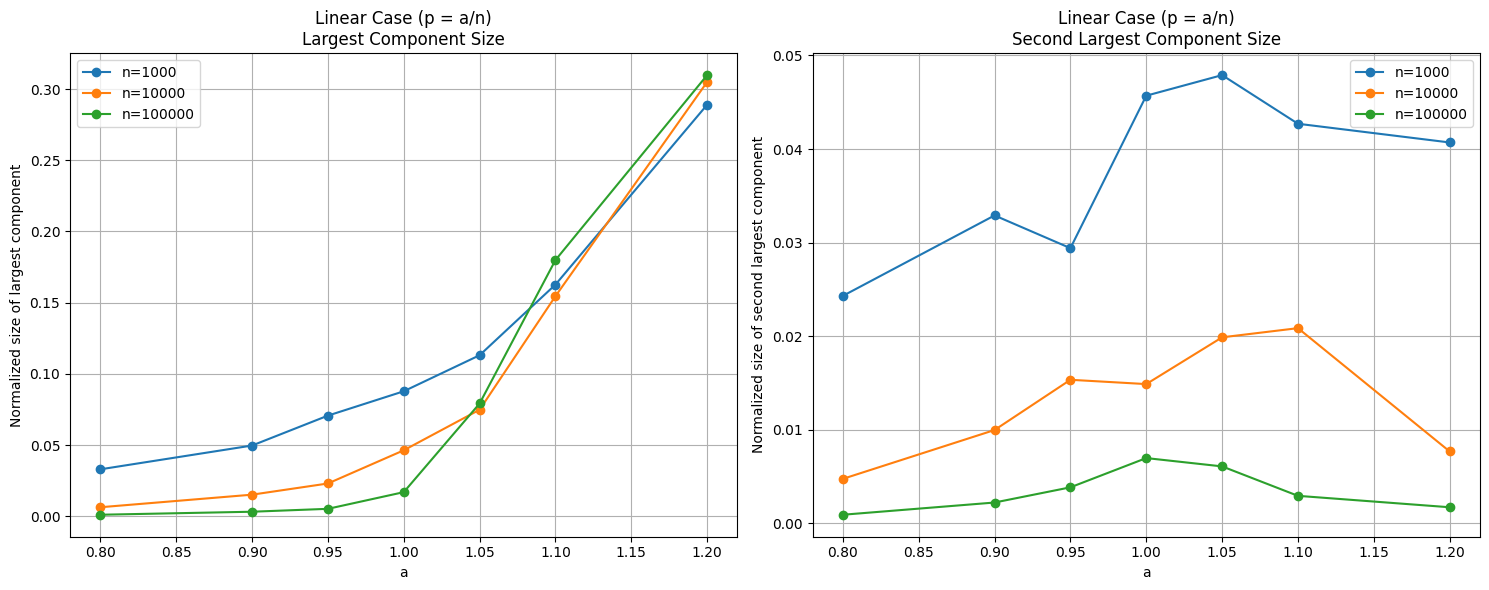

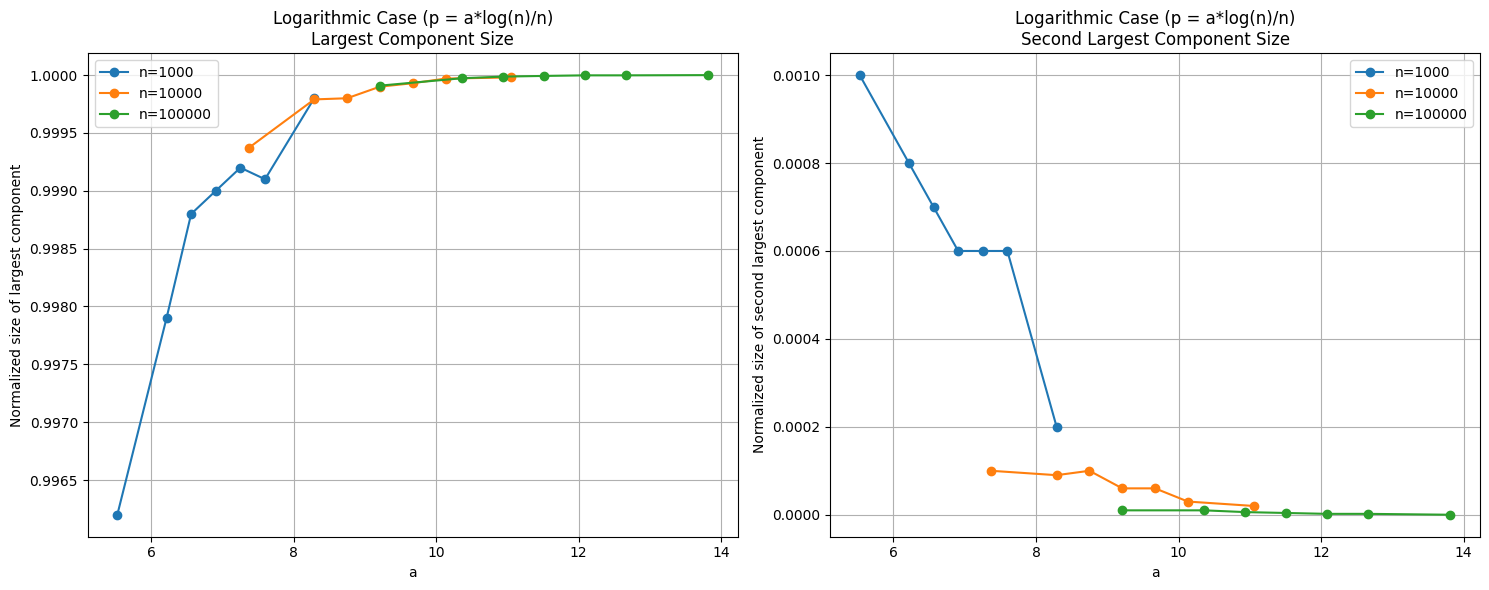

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

def analyze_graph_components(n, p, num_iterations=10):
    results = []
    for _ in range(num_iterations):
        G = nx.fast_gnp_random_graph(n, p)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        results.append({
            'n': n,
            'p': p,
            'largest_component': largest / n,  # Normalized size
            'second_largest_component': second_largest / n  # Normalized size
        })
    return results

# Parameters
n_values = [1000, 10000, 100000]  # 10^6 is too computationally intensive
a_values = [0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2]
iterations = 10

# Part 1: p = a/n
results_linear = []
for n in n_values:
    for a in a_values:
        p = a/n
        results_linear.extend(analyze_graph_components(n, p, iterations))

# Part 2: p = a*log(n)/n
results_log = []
for n in n_values:
    for a in a_values:
        p = a * np.log(n)/n
        results_log.extend(analyze_graph_components(n, p, iterations))

# Convert to DataFrames
df_linear = pd.DataFrame(results_linear)
df_log = pd.DataFrame(results_log)

# Plotting function
def create_component_size_plots(df, title_prefix):
    plt.figure(figsize=(15, 6))
    
    # Plot for largest component
    plt.subplot(1, 2, 1)
    for n in n_values:
        data = df[df['n'] == n]
        p_values = data['p'].unique()
        mean_sizes = data.groupby('p')['largest_component'].mean()
        plt.plot(p_values * n, mean_sizes, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of largest component')
    plt.title(f'{title_prefix}\nLargest Component Size')
    plt.legend()
    plt.grid(True)
    
    # Plot for second largest component
    plt.subplot(1, 2, 2)
    for n in n_values:
        data = df[df['n'] == n]
        p_values = data['p'].unique()
        mean_sizes = data.groupby('p')['second_largest_component'].mean()
        plt.plot(p_values * n, mean_sizes, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of second largest component')
    plt.title(f'{title_prefix}\nSecond Largest Component Size')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return plt

# Create plots
fig1 = create_component_size_plots(df_linear, 'Linear Case (p = a/n)')
fig2 = create_component_size_plots(df_log, 'Logarithmic Case (p = a*log(n)/n)')

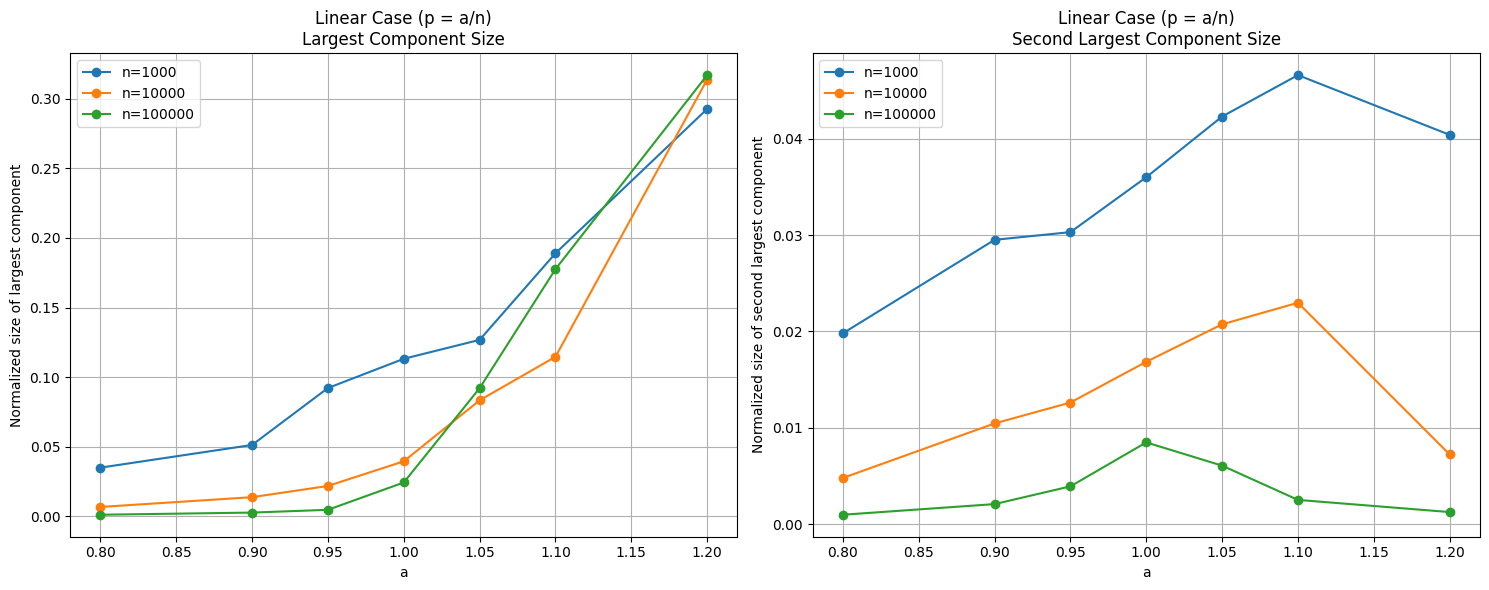

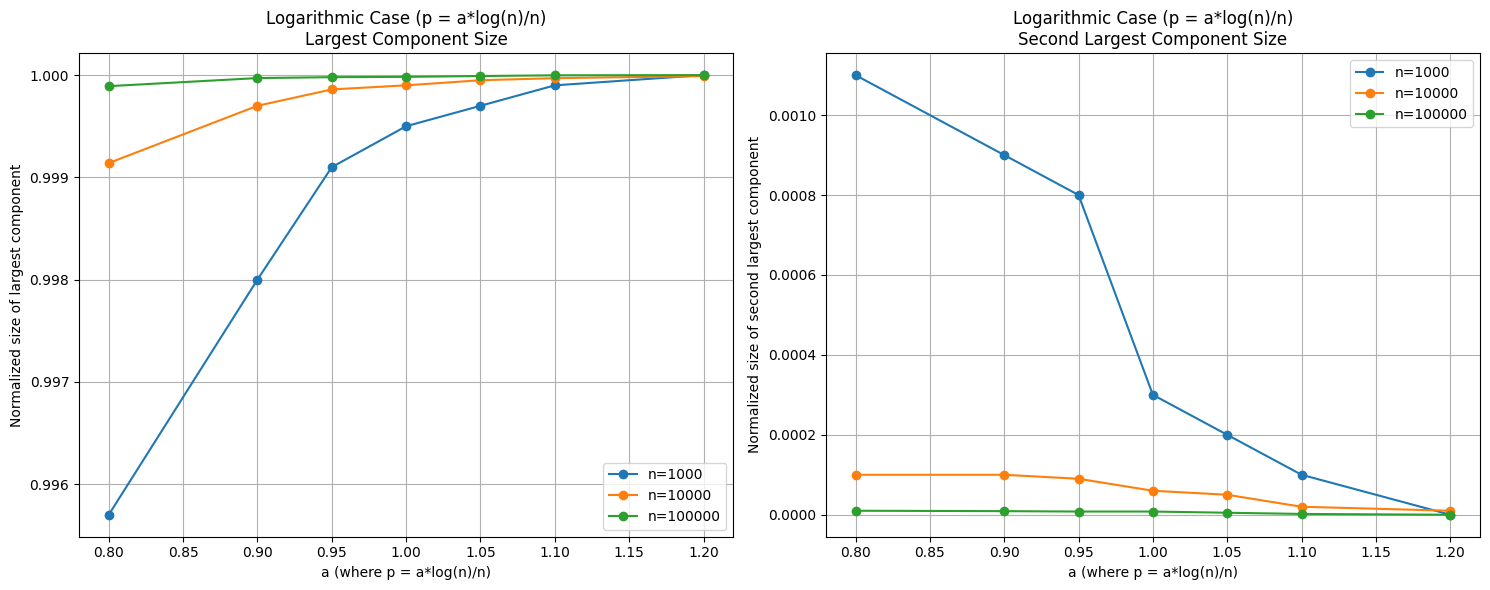

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

def analyze_graph_components(n, p, num_iterations=10):
    results = []
    for _ in range(num_iterations):
        G = nx.fast_gnp_random_graph(n, p)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        results.append({
            'n': n,
            'p': p,
            'largest_component': largest / n,  # Normalized size
            'second_largest_component': second_largest / n  # Normalized size
        })
    return results

# Parameters
n_values = [1000, 10000, 100000]  # 10^6 is too computationally intensive
a_values = [0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2]
iterations = 10

# Part 1: p = a/n
results_linear = []
for n in n_values:
    for a in a_values:
        p = a/n
        results_linear.extend(analyze_graph_components(n, p, iterations))

# Part 2: p = a*log(n)/n
results_log = []
for n in n_values:
    for a in a_values:
        p = a * np.log(n)/n
        # Store the original 'a' value for plotting
        results_extend = analyze_graph_components(n, p, iterations)
        for r in results_extend:
            r['a'] = a  # Store the original 'a' value
        results_log.extend(results_extend)

# Convert to DataFrames
df_linear = pd.DataFrame(results_linear)
df_log = pd.DataFrame(results_log)

# Plotting function for linear case
def create_linear_component_plots(df, title_prefix):
    plt.figure(figsize=(15, 6))
    
    # Plot for largest component
    plt.subplot(1, 2, 1)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('p')['largest_component'].mean()
        plt.plot(mean_sizes.index * n, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of largest component')
    plt.title(f'{title_prefix}\nLargest Component Size')
    plt.legend()
    plt.grid(True)
    
    # Plot for second largest component
    plt.subplot(1, 2, 2)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('p')['second_largest_component'].mean()
        plt.plot(mean_sizes.index * n, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a')
    plt.ylabel('Normalized size of second largest component')
    plt.title(f'{title_prefix}\nSecond Largest Component Size')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return plt

# Modified plotting function for logarithmic case
def create_log_component_plots(df, title_prefix):
    plt.figure(figsize=(15, 6))
    
    # Plot for largest component
    plt.subplot(1, 2, 1)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('a')['largest_component'].mean()
        plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a (where p = a*log(n)/n)')
    plt.ylabel('Normalized size of largest component')
    plt.title(f'{title_prefix}\nLargest Component Size')
    plt.legend()
    plt.grid(True)
    
    # Plot for second largest component
    plt.subplot(1, 2, 2)
    for n in n_values:
        data = df[df['n'] == n]
        mean_sizes = data.groupby('a')['second_largest_component'].mean()
        plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')
    
    plt.xlabel('a (where p = a*log(n)/n)')
    plt.ylabel('Normalized size of second largest component')
    plt.title(f'{title_prefix}\nSecond Largest Component Size')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    return plt

# Create plots
fig1 = create_linear_component_plots(df_linear, 'Linear Case (p = a/n)')
fig2 = create_log_component_plots(df_log, 'Logarithmic Case (p = a*log(n)/n)')

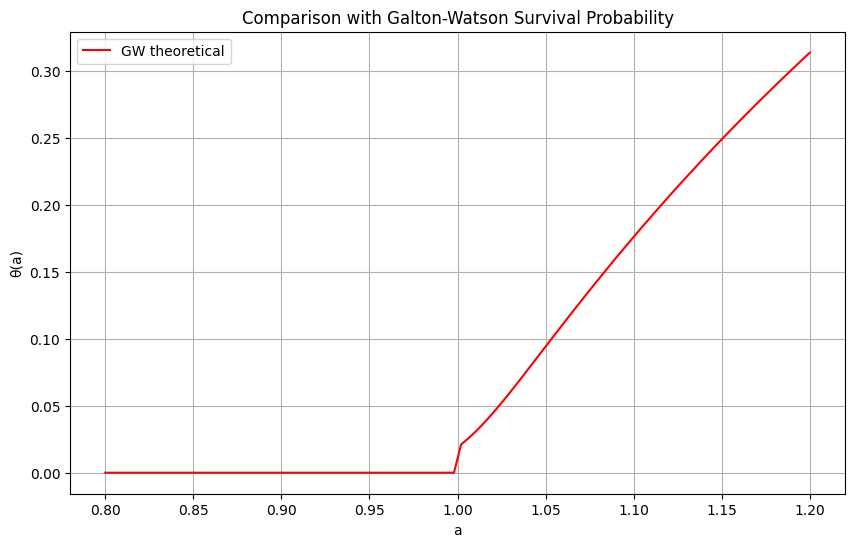

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def survival_probability(a, iterations=100):
    """Calculate the survival probability θ(a) for the Galton-Watson process"""
    theta = 0.5  # Initial guess
    for _ in range(iterations):
        theta_new = 1 - np.exp(-a * theta)
        if abs(theta - theta_new) < 1e-10:
            break
        theta = theta_new
    return theta

# Generate theoretical curve
a_range = np.linspace(0.8, 1.2, 100)
theta_values = [survival_probability(a) if a > 1 else 0 for a in a_range]

plt.figure(figsize=(10, 6))
plt.plot(a_range, theta_values, 'r-', label='GW theoretical')
plt.xlabel('a')
plt.ylabel('θ(a)')
plt.title('Comparison with Galton-Watson Survival Probability')
plt.grid(True)
plt.legend()

n=10000, r=0.018757: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


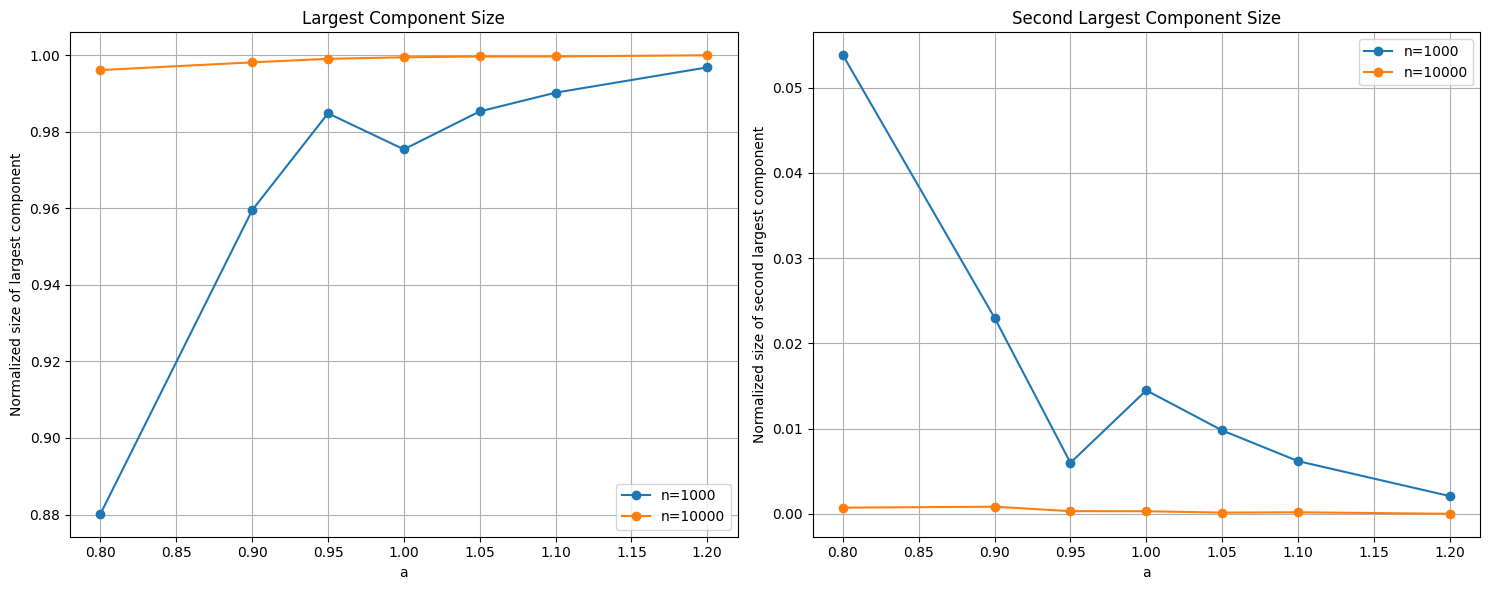


Summary Statistics:

For n = 1000:

a = 0.8:
Average largest component size: 0.880
Average second largest component size: 0.054

a = 0.9:
Average largest component size: 0.960
Average second largest component size: 0.023

a = 0.95:
Average largest component size: 0.985
Average second largest component size: 0.006

a = 1.0:
Average largest component size: 0.975
Average second largest component size: 0.015

a = 1.05:
Average largest component size: 0.985
Average second largest component size: 0.010

a = 1.1:
Average largest component size: 0.990
Average second largest component size: 0.006

a = 1.2:
Average largest component size: 0.997
Average second largest component size: 0.002

For n = 10000:

a = 0.8:
Average largest component size: 0.996
Average second largest component size: 0.001

a = 0.9:
Average largest component size: 0.998
Average second largest component size: 0.001

a = 0.95:
Average largest component size: 0.999
Average second largest component size: 0.000

a = 1.0:
Avera

In [1]:
import numpy as np
import networkx as nx
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def generate_geometric_graph(n, r):
    """
    Generate a random geometric graph in [0,1]^2 with radius r
    """
    # Generate random positions
    positions = np.random.uniform(0, 1, size=(n, 2))
    
    # Calculate pairwise distances
    distances = squareform(pdist(positions))
    
    # Create adjacency matrix based on distance threshold
    adjacency = (distances < r) & (distances > 0)
    
    # Create NetworkX graph
    G = nx.from_numpy_array(adjacency)
    
    return G

def analyze_graph_components(n, r, num_iterations=10):
    """
    Analyze component sizes for given parameters
    """
    results = []
    for _ in tqdm(range(num_iterations), desc=f"n={n}, r={r:.6f}"):
        G = generate_geometric_graph(n, r)
        components = sorted([len(c) for c in nx.connected_components(G)], reverse=True)
        largest = components[0] if components else 0
        second_largest = components[1] if len(components) > 1 else 0
        
        results.append({
            'n': n,
            'r': r,
            'a': r * r * np.pi * n / np.log(n),  # Reverse calculate a
            'largest_component': largest / n,  # Normalized size
            'second_largest_component': second_largest / n  # Normalized size
        })
    return results

# Parameters
n_values = [1000, 10000]  # Add 1000000 if computational resources allow
a_values = [0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.2]
iterations = 10

# Run analysis
results = []
for n in n_values:
    for a in a_values:
        # Calculate r based on the formula r = sqrt(a*log(n)/(pi*n))
        r = np.sqrt(a * np.log(n) / (np.pi * n))
        results.extend(analyze_graph_components(n, r, iterations))

# Convert to DataFrame
df = pd.DataFrame(results)

# Create visualization
plt.figure(figsize=(15, 6))

# Plot for largest component
plt.subplot(1, 2, 1)
for n in n_values:
    data = df[df['n'] == n]
    mean_sizes = data.groupby('a')['largest_component'].mean()
    plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')

plt.xlabel('a')
plt.ylabel('Normalized size of largest component')
plt.title('Largest Component Size')
plt.legend()
plt.grid(True)

# Plot for second largest component
plt.subplot(1, 2, 2)
for n in n_values:
    data = df[df['n'] == n]
    mean_sizes = data.groupby('a')['second_largest_component'].mean()
    plt.plot(mean_sizes.index, mean_sizes.values, 'o-', label=f'n={n}')

plt.xlabel('a')
plt.ylabel('Normalized size of second largest component')
plt.title('Second Largest Component Size')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save results to CSV
df.to_csv('geometric_graph_results.csv', index=False)

if __name__ == "__main__":
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    for n in n_values:
        print(f"\nFor n = {n}:")
        n_data = df[df['n'] == n]
        for a in a_values:
            a_data = n_data[n_data['a'].round(3) == a]
            print(f"\na = {a}:")
            print(f"Average largest component size: {a_data['largest_component'].mean():.3f}")
            print(f"Average second largest component size: {a_data['second_largest_component'].mean():.3f}")

In [4]:
import networkx as nx
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import psutil
import os

def generate_gnp_baseline(n, p):
    return nx.gnp_random_graph(n, p)

def generate_gnp_linear_set(n, p):
    lambda_param = p * n * (n-1) / 2
    m = np.random.poisson(lambda_param)
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    edges = set()
    while len(edges) < m:
        i = np.random.randint(0, n)
        j = np.random.randint(0, n)
        if i != j:
            edge = tuple(sorted((i, j)))
            edges.add(edge)
    
    G.add_edges_from(edges)
    return G

def generate_gnp_linear_dict(n, p):
    lambda_param = p * n * (n-1) / 2
    m = np.random.poisson(lambda_param)
    edges = {}
    edge_count = 0
    
    while edge_count < m:
        i = np.random.randint(0, n)
        j = np.random.randint(0, n)
        if i != j:
            edge_hash = ((i + j) * (i + j + 1)) // 2 + j
            if edge_hash not in edges:
                edges[edge_hash] = (i, j)
                edge_count += 1
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges.values())
    return G

def generate_gnp_linear_optimized(n, p):
    lambda_param = p * n * (n-1) / 2
    m = np.random.poisson(lambda_param)
    
    edges = np.zeros((m, 2), dtype=np.int32)
    edge_set = set()
    
    batch_size = min(1000, m)
    current_edges = 0
    
    while current_edges < m:
        batch_i = np.random.randint(0, n, batch_size)
        batch_j = np.random.randint(0, n, batch_size)
        
        for i, j in zip(batch_i, batch_j):
            if i != j:
                edge = tuple(sorted((i, j)))
                if edge not in edge_set:
                    edge_set.add(edge)
                    edges[current_edges] = [i, j]
                    current_edges += 1
                    if current_edges == m:
                        break
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges[:current_edges])
    return G

def benchmark_time(func, n, p, num_trials=5):
    """Measure execution time for a given implementation"""
    times = []
    for _ in range(num_trials):
        start_time = time.time()
        G = func(n, p)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

def benchmark_memory(func, n, p):
    """Measure peak memory usage for a given implementation"""
    process = psutil.Process(os.getpid())
    initial_memory = process.memory_info().rss / 1024 / 1024  # Convert to MB
    
    # Run the function
    G = func(n, p)
    
    # Measure peak memory after running
    peak_memory = process.memory_info().rss / 1024 / 1024  # Convert to MB
    
    # Return the difference in memory usage
    memory_used = peak_memory - initial_memory
    return max(0.1, memory_used)  # Return at least 0.1 to avoid division by zero in log scale

def run_comprehensive_benchmark():
    """Run comprehensive benchmarks across different n values"""
    implementations = {
        'NetworkX Baseline': generate_gnp_baseline,
        'Set-based': generate_gnp_linear_set,
        'Dictionary-based': generate_gnp_linear_dict,
        'Optimized Batch': generate_gnp_linear_optimized
    }
    
    n_values = [1000, 5000, 10000, 50000,100000]
    results = {name: {'time': [], 'time_std': [], 'memory': []} for name in implementations}
    
    for n in tqdm(n_values, desc="Benchmarking across n values"):
        p = 3.0 / n  # Setting p = O(1/n)
        
        for name, func in implementations.items():
            print(f"\nBenchmarking {name} with n={n}")
            # Time benchmark
            mean_time, std_time = benchmark_time(func, n, p)
            results[name]['time'].append(mean_time)
            results[name]['time_std'].append(std_time)
            
            # Memory benchmark
            mem_usage = benchmark_memory(func, n, p)
            results[name]['memory'].append(mem_usage)
            print(f"Memory usage: {mem_usage:.2f} MB")
    
    # Create visualization
    plt.figure(figsize=(15, 6))
    
    # Time plot
    plt.subplot(1, 2, 1)
    for name in implementations:
        plt.errorbar(n_values, results[name]['time'], 
                    yerr=results[name]['time_std'],
                    label=name, marker='o')
    plt.xlabel('Number of nodes (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time Comparison')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    
    # Memory plot
    plt.subplot(1, 2, 2)
    for name in implementations:
        plt.plot(n_values, results[name]['memory'], 
                label=name, marker='o')
    plt.xlabel('Number of nodes (n)')
    plt.ylabel('Peak Memory Usage (MB)')
    plt.title('Memory Usage Comparison')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()
    return plt, results

if __name__ == "__main__":
    plt, results = run_comprehensive_benchmark()
    plt.show()
    
    # Print detailed results
    print("\nDetailed Benchmark Results:")
    print("-" * 50)
    for n in [1000, 5000, 10000, 50000,100000]:
        print(f"\nResults for n = {n}:")
        for name in results:
            idx = [1000, 5000, 10000, 50000,100000].index(n)
            print(f"\n{name}:")
            print(f"Time: {results[name]['time'][idx]:.4f} ± {results[name]['time_std'][idx]:.4f} seconds")
            print(f"Memory: {results[name]['memory'][idx]:.2f} MB")

Benchmarking across n values:  20%|██        | 1/5 [00:00<00:00,  4.65it/s]


Benchmarking NetworkX Baseline with n=1000
Memory usage: 0.10 MB

Benchmarking Set-based with n=1000
Memory usage: 0.10 MB

Benchmarking Dictionary-based with n=1000
Memory usage: 0.10 MB

Benchmarking Optimized Batch with n=1000
Memory usage: 0.10 MB

Benchmarking NetworkX Baseline with n=5000
Memory usage: 0.38 MB

Benchmarking Set-based with n=5000
Memory usage: 0.10 MB

Benchmarking Dictionary-based with n=5000
Memory usage: 0.10 MB

Benchmarking Optimized Batch with n=5000


Benchmarking across n values:  40%|████      | 2/5 [00:03<00:05,  1.92s/it]

Memory usage: 0.10 MB

Benchmarking NetworkX Baseline with n=10000
Memory usage: 0.10 MB

Benchmarking Set-based with n=10000
Memory usage: 0.19 MB

Benchmarking Dictionary-based with n=10000
Memory usage: 0.10 MB

Benchmarking Optimized Batch with n=10000


Benchmarking across n values:  60%|██████    | 3/5 [00:14<00:11,  5.94s/it]

Memory usage: 0.10 MB

Benchmarking NetworkX Baseline with n=50000


Benchmarking across n values:  60%|██████    | 3/5 [04:04<02:42, 81.35s/it]


KeyboardInterrupt: 

In [7]:
import networkx as nx
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# Implementation 1: NetworkX's built-in method (baseline)
def generate_gnp_baseline(n, p):
    return nx.gnp_random_graph(n, p)

# Implementation 2: Set-based method
def generate_gnp_linear_set(n, p):
    # Generate number of edges using Poisson approximation
    lambda_param = p * n * (n-1) / 2
    m = np.random.poisson(lambda_param)
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    edges = set()
    while len(edges) < m:
        i = np.random.randint(0, n)
        j = np.random.randint(0, n)
        if i != j:
            edge = tuple(sorted((i, j)))
            edges.add(edge)
    
    G.add_edges_from(edges)
    return G

# Implementation 3: Dictionary-based method
def generate_gnp_linear_dict(n, p):
    lambda_param = p * n * (n-1) / 2
    m = np.random.poisson(lambda_param)
    edges = {}
    edge_count = 0
    
    while edge_count < m:
        i = np.random.randint(0, n)
        j = np.random.randint(0, n)
        if i != j:
            edge_hash = ((i + j) * (i + j + 1)) // 2 + j
            if edge_hash not in edges:
                edges[edge_hash] = (i, j)
                edge_count += 1
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges.values())
    return G

# Implementation 4: Optimized batch method
def generate_gnp_linear_optimized(n, p):
    lambda_param = p * n * (n-1) / 2
    m = np.random.poisson(lambda_param)
    
    edges = np.zeros((m, 2), dtype=np.int32)
    edge_set = set()
    
    batch_size = min(1000, m)
    current_edges = 0
    
    while current_edges < m:
        batch_i = np.random.randint(0, n, batch_size)
        batch_j = np.random.randint(0, n, batch_size)
        
        for i, j in zip(batch_i, batch_j):
            if i != j:
                edge = tuple(sorted((i, j)))
                if edge not in edge_set:
                    edge_set.add(edge)
                    edges[current_edges] = [i, j]
                    current_edges += 1
                    if current_edges == m:
                        break
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges[:current_edges])
    return G

def get_process_memory():
    """Get current memory usage in MB"""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024  # Convert to MB

def benchmark_time(func, n, p, num_trials=5):
    """Measure execution time for a given implementation"""
    times = []
    for _ in range(num_trials):
        start_time = time.time()
        G = func(n, p)
        end_time = time.time()
        times.append(end_time - start_time)
    return np.mean(times), np.std(times)

def benchmark_memory(func, n, p):
    """Measure memory usage for a given implementation"""
    # Get baseline memory
    base_memory = get_process_memory()
    
    # Run function
    G = func(n, p)
    
    # Get peak memory
    peak_memory = get_process_memory()
    
    # Return memory increase
    return peak_memory - base_memory

def run_comprehensive_benchmark():
    """Run comprehensive benchmarks across different n values"""
    implementations = {
        'NetworkX Baseline': generate_gnp_baseline,
        'Set-based': generate_gnp_linear_set,
        'Dictionary-based': generate_gnp_linear_dict,
        'Optimized Batch': generate_gnp_linear_optimized
    }
    
    n_values = [1000, 5000, 10000]  # Reduced for initial testing
    results = {name: {'time': [], 'time_std': [], 'memory': []} for name in implementations}
    
    for n in tqdm(n_values, desc="Benchmarking across n values"):
        p = 3.0 / n  # Setting p = O(1/n)
        
        for name, func in implementations.items():
            print(f"\nTesting {name} with n={n}")
            
            # Time benchmark
            mean_time, std_time = benchmark_time(func, n, p)
            results[name]['time'].append(mean_time)
            results[name]['time_std'].append(std_time)
            
            # Memory benchmark
            mem_usage = benchmark_memory(func, n, p)
            results[name]['memory'].append(mem_usage)
            
            print(f"Time: {mean_time:.4f} ± {std_time:.4f} seconds")
            print(f"Memory: {mem_usage:.2f} MB")
    
    # Create visualization
    plt.figure(figsize=(15, 6))
    
    # Time plot
    plt.subplot(1, 2, 1)
    for name in implementations:
        plt.errorbar(n_values, results[name]['time'], 
                    yerr=results[name]['time_std'],
                    label=name, marker='o')
    plt.xlabel('Number of nodes (n)')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time Comparison')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    
    # Memory plot
    plt.subplot(1, 2, 2)
    for name in implementations:
        plt.plot(n_values, results[name]['memory'], 
                label=name, marker='o')
    plt.xlabel('Number of nodes (n)')
    plt.ylabel('Memory Usage (MB)')
    plt.title('Memory Usage Comparison')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()
    return plt, results

def print_detailed_results(results):
    print("\nDetailed Benchmark Results:")
    print("-" * 50)
    n_values = [1000, 5000, 10000]
    for n in n_values:
        print(f"\nResults for n = {n}:")
        for name in results:
            idx = n_values.index(n)
            print(f"\n{name}:")
            print(f"Time: {results[name]['time'][idx]:.4f} ± {results[name]['time_std'][idx]:.4f} seconds")
            print(f"Memory: {results[name]['memory'][idx]:.2f} MB")

if __name__ == "__main__":
    plt, results = run_comprehensive_benchmark()
    plt.show()
    print_detailed_results(results)

Benchmarking across n values:  25%|██▌       | 1/4 [00:00<00:00,  4.76it/s]


Testing NetworkX Baseline with n=1000
Time: 0.0194 ± 0.0044 seconds
Memory: 0.02 MB

Testing Set-based with n=1000
Time: 0.0046 ± 0.0013 seconds
Memory: 0.03 MB

Testing Dictionary-based with n=1000
Time: 0.0040 ± 0.0002 seconds
Memory: 0.00 MB

Testing Optimized Batch with n=1000
Time: 0.0067 ± 0.0007 seconds
Memory: 0.00 MB

Testing NetworkX Baseline with n=5000
Time: 0.4220 ± 0.0150 seconds
Memory: 103.05 MB

Testing Set-based with n=5000
Time: 0.0205 ± 0.0012 seconds
Memory: 0.48 MB

Testing Dictionary-based with n=5000
Time: 0.0191 ± 0.0004 seconds
Memory: 0.02 MB

Testing Optimized Batch with n=5000


Benchmarking across n values:  50%|█████     | 2/4 [00:03<00:03,  1.90s/it]

Time: 0.0389 ± 0.0128 seconds
Memory: 0.02 MB

Testing NetworkX Baseline with n=10000
Time: 1.6218 ± 0.0160 seconds
Memory: -3.62 MB

Testing Set-based with n=10000
Time: 0.0459 ± 0.0141 seconds
Memory: 0.11 MB

Testing Dictionary-based with n=10000
Time: 0.0394 ± 0.0011 seconds
Memory: 0.00 MB

Testing Optimized Batch with n=10000


Benchmarking across n values:  75%|███████▌  | 3/4 [00:13<00:05,  5.90s/it]

Time: 0.0657 ± 0.0010 seconds
Memory: 0.00 MB

Testing NetworkX Baseline with n=100000


Benchmarking across n values:  75%|███████▌  | 3/4 [14:08<04:42, 282.68s/it]


KeyboardInterrupt: 

p₁=0.8: 100%|██████████| 100/100 [00:13<00:00,  7.16it/s]



Results for n=10000, p=0.002763

Initial probability p₁ = 0.5
Probability of reaching +1 consensus: 0.380
Average steps to consensus: 6.4 ± 1.5

Initial probability p₁ = 0.6
Probability of reaching +1 consensus: 1.000
Average steps to consensus: 2.7 ± 0.5

Initial probability p₁ = 0.7
Probability of reaching +1 consensus: 1.000
Average steps to consensus: 2.0 ± 0.0

Initial probability p₁ = 0.8
Probability of reaching +1 consensus: 1.000
Average steps to consensus: 2.0 ± 0.1


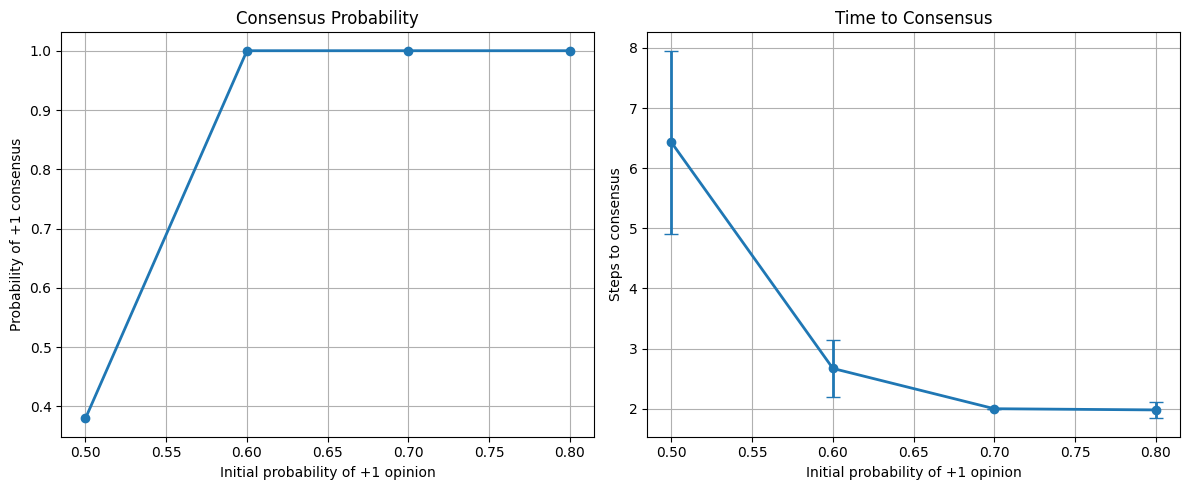

In [10]:
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def simulate_majority_model(n, p, initial_prob, max_steps=1000):
    """
    Simulate majority model on G(n,p) random graph
    
    Parameters:
    - n: number of nodes
    - p: edge probability
    - initial_prob: probability of +1 initial opinion
    - max_steps: maximum simulation steps
    
    Returns:
    - reached_consensus: whether +1 consensus was reached
    - steps_to_consensus: number of steps to reach consensus (-1 if not reached)
    - opinion_history: list of proportion of +1 opinions over time
    """
    # Generate random graph
    G = nx.fast_gnp_random_graph(n, p)
    
    # Initialize opinions randomly
    opinions = np.where(np.random.random(n) < initial_prob, 1, -1)
    
    # Track proportion of +1 opinions over time
    opinion_history = [np.mean(opinions == 1)]
    
    # Run simulation
    for step in range(max_steps):
        # Random node order for synchronous updates
        node_order = np.random.permutation(n)
        new_opinions = opinions.copy()
        
        # Update each node based on majority rule
        for node in node_order:
            neighbors = list(G.neighbors(node))
            if len(neighbors) > 0:
                neighbor_opinions = opinions[neighbors]
                # Update based on majority (random choice if tied)
                majority = np.sum(neighbor_opinions)
                if majority > 0:
                    new_opinions[node] = 1
                elif majority < 0:
                    new_opinions[node] = -1
                else:
                    new_opinions[node] = np.random.choice([1, -1])
        
        # Update opinions
        opinions = new_opinions
        opinion_history.append(np.mean(opinions == 1))
        
        # Check if consensus reached
        if np.all(opinions == 1):
            return True, step + 1, opinion_history
        elif np.all(opinions == -1):
            return False, step + 1, opinion_history
    
    return None, -1, opinion_history

def run_multiple_simulations(n, p, initial_prob, num_simulations=100):
    """Run multiple simulations and collect statistics"""
    results = []
    for _ in tqdm(range(num_simulations), desc=f"p₁={initial_prob}"):
        reached_consensus, steps, history = simulate_majority_model(n, p, initial_prob)
        results.append({
            'reached_positive_consensus': reached_consensus,
            'steps_to_consensus': steps,
            'final_proportion': history[-1]
        })
    return results

if __name__ == "__main__":
    # Parameters
    n = 10000  # 10^4 nodes
    p = 3 * np.log(n) / n  # edge probability
    initial_probs = [0.5, 0.6, 0.7, 0.8]  # initial probabilities of +1 opinion
    num_simulations = 100

    # Run simulations for each initial probability
    all_results = []
    for prob in initial_probs:
        simulation_results = run_multiple_simulations(n, p, prob, num_simulations)
        for result in simulation_results:
            result['initial_prob'] = prob
        all_results.extend(simulation_results)

    # Calculate statistics
    stats = {}
    for prob in initial_probs:
        prob_results = [r for r in all_results if r['initial_prob'] == prob]
        positive_consensus = [r for r in prob_results if r['reached_positive_consensus']]
        
        stats[prob] = {
            'prob_positive_consensus': len(positive_consensus) / len(prob_results),
            'avg_steps': np.mean([r['steps_to_consensus'] for r in prob_results if r['steps_to_consensus'] > 0]),
            'std_steps': np.std([r['steps_to_consensus'] for r in prob_results if r['steps_to_consensus'] > 0])
        }

    # Print results
    print(f"\nResults for n={n}, p={p:.6f}")
    for prob, stat in stats.items():
        print(f"\nInitial probability p₁ = {prob}")
        print(f"Probability of reaching +1 consensus: {stat['prob_positive_consensus']:.3f}")
        print(f"Average steps to consensus: {stat['avg_steps']:.1f} ± {stat['std_steps']:.1f}")

    # Create visualization
    plt.figure(figsize=(12, 5))
    
    # Plot probability of +1 consensus
    plt.subplot(1, 2, 1)
    probs = list(stats.keys())
    consensus_probs = [stats[p]['prob_positive_consensus'] for p in probs]
    plt.plot(probs, consensus_probs, 'o-', linewidth=2)
    plt.xlabel('Initial probability of +1 opinion')
    plt.ylabel('Probability of +1 consensus')
    plt.grid(True)
    plt.title('Consensus Probability')

    # Plot average steps to consensus
    plt.subplot(1, 2, 2)
    avg_steps = [stats[p]['avg_steps'] for p in probs]
    std_steps = [stats[p]['std_steps'] for p in probs]
    plt.errorbar(probs, avg_steps, yerr=std_steps, fmt='o-', linewidth=2, capsize=5)
    plt.xlabel('Initial probability of +1 opinion')
    plt.ylabel('Steps to consensus')
    plt.grid(True)
    plt.title('Time to Consensus')

    plt.tight_layout()
    plt.show()

p₁=0.5:   0%|          | 0/100 [00:00<?, ?it/s]


Graph validation:
Average degree: 27.74 (Expected: 27.63)
Is connected: True

Initial state:
Number of +1 opinions: 5022 (50.22%)
Number of -1 opinions: 4978 (49.78%)

Step 1:
Local majority distribution: {'positive_majority': 0.4763, 'negative_majority': 0.4527, 'tie': 0.071}
Number of opinion changes: 4626
Current +1 ratio: 0.512

Step 2:
Local majority distribution: {'positive_majority': 0.5095, 'negative_majority': 0.4342, 'tie': 0.0563}
Number of opinion changes: 4330
Current +1 ratio: 0.538

Step 3:
Local majority distribution: {'negative_majority': 0.3835, 'tie': 0.0453, 'positive_majority': 0.5712}
Number of opinion changes: 4043
Current +1 ratio: 0.591

Step 4:
Local majority distribution: {'positive_majority': 0.7019, 'negative_majority': 0.2542, 'tie': 0.0439}
Number of opinion changes: 3692
Current +1 ratio: 0.723

Step 5:
Local majority distribution: {'positive_majority': 0.9567, 'negative_majority': 0.0283, 'tie': 0.015}


p₁=0.5:   1%|          | 1/100 [00:00<01:12,  1.36it/s]

Number of opinion changes: 2684
Current +1 ratio: 0.964

Reached +1 consensus after 6 steps


p₁=0.6:   0%|          | 0/100 [00:00<?, ?it/s]


Graph validation:
Average degree: 27.67 (Expected: 27.63)
Is connected: True

Initial state:
Number of +1 opinions: 5942 (59.42%)
Number of -1 opinions: 4058 (40.58%)

Step 1:
Local majority distribution: {'negative_majority': 0.1397, 'positive_majority': 0.8156, 'tie': 0.0447}
Number of opinion changes: 4078
Current +1 ratio: 0.842

Step 2:
Local majority distribution: {'positive_majority': 0.9995, 'negative_majority': 0.0003, 'tie': 0.0002}
Number of opinion changes: 1580
Current +1 ratio: 1.000

Step 3:


p₁=0.6:   1%|          | 1/100 [00:00<00:48,  2.03it/s]

Local majority distribution: {'positive_majority': 1.0}
Number of opinion changes: 4
Current +1 ratio: 1.000

Reached +1 consensus after 3 steps


p₁=0.7:   1%|          | 1/100 [00:00<00:43,  2.27it/s]


Graph validation:
Average degree: 27.57 (Expected: 27.63)
Is connected: True

Initial state:
Number of +1 opinions: 6963 (69.63%)
Number of -1 opinions: 3037 (30.37%)

Step 1:
Local majority distribution: {'positive_majority': 0.9777, 'negative_majority': 0.014, 'tie': 0.0083}
Number of opinion changes: 3072
Current +1 ratio: 0.984

Step 2:
Local majority distribution: {'positive_majority': 1.0}
Number of opinion changes: 163
Current +1 ratio: 1.000

Reached +1 consensus after 2 steps


p₁=0.8:   1%|          | 1/100 [00:00<00:41,  2.37it/s]


Graph validation:
Average degree: 27.68 (Expected: 27.63)
Is connected: True

Initial state:
Number of +1 opinions: 7979 (79.79%)
Number of -1 opinions: 2021 (20.21%)

Step 1:
Local majority distribution: {'positive_majority': 0.9995, 'tie': 0.0002, 'negative_majority': 0.0003}
Number of opinion changes: 2022
Current +1 ratio: 1.000

Step 2:
Local majority distribution: {'positive_majority': 1.0}
Number of opinion changes: 3
Current +1 ratio: 1.000

Reached +1 consensus after 2 steps


p₁=0.8: 100%|██████████| 100/100 [00:31<00:00,  3.22it/s]



Results for initial probability p₁ = 0.5
Positive consensus: 51/100 (0.510)
Average steps to consensus: 6.2 ± 1.6

First run evolution:
Step 0: 0.502 ratio of +1 opinions
Step 1: 0.512 ratio of +1 opinions
Step 2: 0.538 ratio of +1 opinions
Step 3: 0.591 ratio of +1 opinions
Step 4: 0.723 ratio of +1 opinions

Results for initial probability p₁ = 0.6
Positive consensus: 100/100 (1.000)
Average steps to consensus: 2.5 ± 0.5

First run evolution:
Step 0: 0.594 ratio of +1 opinions
Step 1: 0.842 ratio of +1 opinions
Step 2: 1.000 ratio of +1 opinions
Step 3: 1.000 ratio of +1 opinions

Results for initial probability p₁ = 0.7
Positive consensus: 100/100 (1.000)
Average steps to consensus: 2.0 ± 0.0

First run evolution:
Step 0: 0.696 ratio of +1 opinions
Step 1: 0.984 ratio of +1 opinions
Step 2: 1.000 ratio of +1 opinions

Results for initial probability p₁ = 0.8
Positive consensus: 100/100 (1.000)
Average steps to consensus: 2.0 ± 0.2

First run evolution:
Step 0: 0.798 ratio of +1 opi

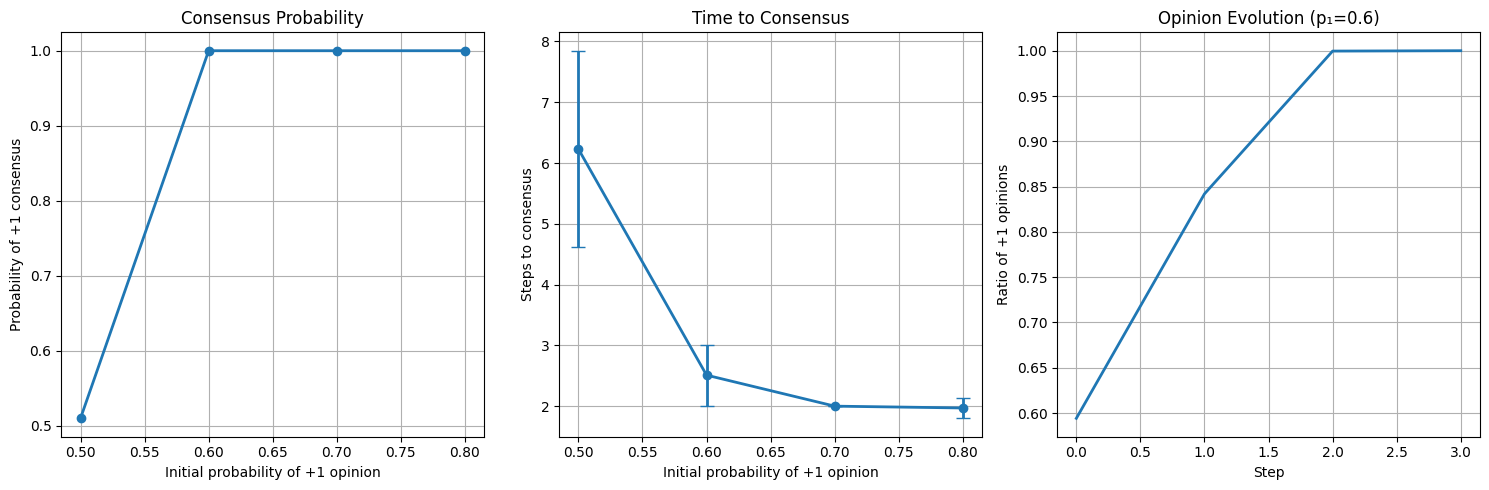

In [11]:
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

def validate_graph(G, n, p):
    """Validate the generated graph properties"""
    avg_degree = sum(dict(G.degree()).values()) / n
    expected_degree = p * (n-1)
    print(f"\nGraph validation:")
    print(f"Average degree: {avg_degree:.2f} (Expected: {expected_degree:.2f})")
    print(f"Is connected: {nx.is_connected(G)}")
    return {
        'avg_degree': avg_degree,
        'expected_degree': expected_degree,
        'is_connected': nx.is_connected(G)
    }

def analyze_local_majorities(G, opinions):
    """Analyze the distribution of local majorities"""
    local_stats = defaultdict(int)
    total_nodes = len(G)
    
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:
            neighbor_opinions = opinions[neighbors]
            majority = np.sum(neighbor_opinions)
            if majority > 0:
                local_stats['positive_majority'] += 1
            elif majority < 0:
                local_stats['negative_majority'] += 1
            else:
                local_stats['tie'] += 1
        else:
            local_stats['isolated'] += 1
    
    return {k: v/total_nodes for k, v in local_stats.items()}

def simulate_majority_model(n, p, initial_prob, max_steps=1000, debug=False):
    """
    Enhanced simulation with debugging and validation
    """
    # Generate and validate graph
    G = nx.fast_gnp_random_graph(n, p)
    if debug:
        graph_stats = validate_graph(G, n, p)
    
    # Initialize opinions with tracking of initial state
    opinions = np.where(np.random.random(n) < initial_prob, 1, -1)
    initial_plus_count = np.sum(opinions == 1)
    if debug:
        print(f"\nInitial state:")
        print(f"Number of +1 opinions: {initial_plus_count} ({initial_plus_count/n:.2%})")
        print(f"Number of -1 opinions: {n - initial_plus_count} ({(n - initial_plus_count)/n:.2%})")
    
    # Track detailed evolution
    opinion_history = [(0, np.mean(opinions == 1))]
    majority_stats_history = []
    
    # Run simulation with enhanced tracking
    for step in range(max_steps):
        if debug and step < 5:  # Detailed tracking for first few steps
            print(f"\nStep {step + 1}:")
            majority_stats = analyze_local_majorities(G, opinions)
            majority_stats_history.append(majority_stats)
            print("Local majority distribution:", majority_stats)
        
        # Store previous state for change detection
        prev_opinions = opinions.copy()
        new_opinions = opinions.copy()
        
        # Update each node based on majority rule
        for node in G.nodes():
            neighbors = list(G.neighbors(node))
            if neighbors:
                neighbor_opinions = opinions[neighbors]
                majority = np.sum(neighbor_opinions)
                if majority > 0:
                    new_opinions[node] = 1
                elif majority < 0:
                    new_opinions[node] = -1
                else:
                    # In case of tie, keep current opinion
                    new_opinions[node] = opinions[node]
        
        # Update and track changes
        opinions = new_opinions
        current_plus_ratio = np.mean(opinions == 1)
        opinion_history.append((step + 1, current_plus_ratio))
        
        # Track number of changes
        changes = np.sum(opinions != prev_opinions)
        if debug and step < 5:
            print(f"Number of opinion changes: {changes}")
            print(f"Current +1 ratio: {current_plus_ratio:.3f}")
        
        # Check for consensus or stability
        if np.all(opinions == 1):
            if debug:
                print(f"\nReached +1 consensus after {step + 1} steps")
            return True, step + 1, opinion_history, majority_stats_history
        elif np.all(opinions == -1):
            if debug:
                print(f"\nReached -1 consensus after {step + 1} steps")
            return False, step + 1, opinion_history, majority_stats_history
        elif changes == 0:
            if debug:
                print(f"\nReached stable state (no changes) after {step + 1} steps")
            return None, step + 1, opinion_history, majority_stats_history
        
    if debug:
        print("\nReached maximum steps without consensus")
    return None, -1, opinion_history, majority_stats_history

def run_multiple_simulations(n, p, initial_prob, num_simulations=100):
    """Run multiple simulations with enhanced tracking"""
    results = []
    detailed_first_run = None
    
    for i in tqdm(range(num_simulations), desc=f"p₁={initial_prob}"):
        # Run first simulation with debug mode
        debug_mode = (i == 0)
        result = simulate_majority_model(n, p, initial_prob, debug=debug_mode)
        
        if debug_mode:
            detailed_first_run = result
        
        results.append({
            'reached_positive_consensus': result[0],
            'steps_to_consensus': result[1],
            'opinion_evolution': result[2],
            'majority_stats': result[3] if debug_mode else None
        })
    
    return results, detailed_first_run

if __name__ == "__main__":
    # Parameters
    n = 10000
    p = 3 * np.log(n) / n
    initial_probs = [0.5, 0.6, 0.7, 0.8]
    num_simulations = 100
    
    # Run simulations with enhanced tracking
    all_results = []
    detailed_runs = {}
    
    for prob in initial_probs:
        simulation_results, detailed_run = run_multiple_simulations(n, p, prob, num_simulations)
        detailed_runs[prob] = detailed_run
        
        for result in simulation_results:
            result['initial_prob'] = prob
        all_results.extend(simulation_results)
    
    # Calculate and display enhanced statistics
    stats = {}
    for prob in initial_probs:
        prob_results = [r for r in all_results if r['initial_prob'] == prob]
        positive_consensus = [r for r in prob_results if r['reached_positive_consensus']]
        
        # Calculate statistics
        num_positive = len(positive_consensus)
        num_total = len(prob_results)
        avg_steps = np.mean([r['steps_to_consensus'] for r in prob_results if r['steps_to_consensus'] > 0])
        std_steps = np.std([r['steps_to_consensus'] for r in prob_results if r['steps_to_consensus'] > 0])
        
        stats[prob] = {
            'num_positive': num_positive,
            'num_total': num_total,
            'prob_positive_consensus': num_positive / num_total,
            'avg_steps': avg_steps,
            'std_steps': std_steps
        }
        
        # Print detailed results
        print(f"\nResults for initial probability p₁ = {prob}")
        print(f"Positive consensus: {num_positive}/{num_total} ({num_positive/num_total:.3f})")
        print(f"Average steps to consensus: {avg_steps:.1f} ± {std_steps:.1f}")
        
        # Print detailed evolution for first run
        if detailed_runs[prob] is not None:
            _, _, history, majority_stats = detailed_runs[prob]
            print("\nFirst run evolution:")
            for step, plus_ratio in history[:5]:  # First 5 steps
                print(f"Step {step}: {plus_ratio:.3f} ratio of +1 opinions")
    
    # Enhanced visualization
    plt.figure(figsize=(15, 5))
    
    # Plot probability of +1 consensus
    plt.subplot(1, 3, 1)
    probs = list(stats.keys())
    consensus_probs = [stats[p]['prob_positive_consensus'] for p in probs]
    plt.plot(probs, consensus_probs, 'o-', linewidth=2)
    plt.xlabel('Initial probability of +1 opinion')
    plt.ylabel('Probability of +1 consensus')
    plt.grid(True)
    plt.title('Consensus Probability')
    
    # Plot average steps to consensus
    plt.subplot(1, 3, 2)
    avg_steps = [stats[p]['avg_steps'] for p in probs]
    std_steps = [stats[p]['std_steps'] for p in probs]
    plt.errorbar(probs, avg_steps, yerr=std_steps, fmt='o-', linewidth=2, capsize=5)
    plt.xlabel('Initial probability of +1 opinion')
    plt.ylabel('Steps to consensus')
    plt.grid(True)
    plt.title('Time to Consensus')
    
    # Plot opinion evolution for p₁=0.6 (first run)
    plt.subplot(1, 3, 3)
    history_06 = detailed_runs[0.6][2]
    steps, ratios = zip(*history_06)
    plt.plot(steps, ratios, '-', linewidth=2)
    plt.xlabel('Step')
    plt.ylabel('Ratio of +1 opinions')
    plt.grid(True)
    plt.title('Opinion Evolution (p₁=0.6)')
    
    plt.tight_layout()
    plt.show()